In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('processed_data.csv')
df.head()

,Age,Weight (lbs),Gender,Ethnicity,Smoking status,%GG,Tumor Location (choice=RUL),Tumor Location (choice=RML),Tumor Location (choice=RLL),Tumor Location (choice=LUL),...,Std,Min,Max,Median,SurfaceArea,Elongation,Flatness,Roundness,Time to Event,Event
0,79,146.0,0,2,1,0,0,1,1,1,...,194.164635,-812,154,-56.236328,826.137989,1.436361,1.446431,0.699813,3078,0
1,65,195.0,0,1,2,0,0,1,1,1,...,173.439744,-829,144,-36.021484,1037.374063,1.367921,1.112439,0.781205,70,0
2,65,173.5,1,2,0,0,1,1,1,1,...,172.357348,-815,290,23.177734,755.268235,1.387373,1.089084,0.822009,666,0
3,67,173.5,1,2,1,0,1,1,1,0,...,254.147443,-1024,366,21.595703,912.514223,1.593605,1.631120,0.639694,1172,0
4,84,145.0,1,4,1,0,1,0,1,1,...,107.583454,-783,391,7.496094,2432.305090,1.278080,1.166290,0.735654,1456,1


In [3]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Event'])


In [5]:
cph = CoxPHFitter(penalizer=0.1, l1_ratio=0.5)
cph.fit(train_df, duration_col='Time to Event', event_col='Event')
joblib.dump(cph, "cox_model.pkl")

['cox_model.pkl']

In [5]:
cph.print_summary()  # access the individual results using cph.summary
with open("results_CoxPH.txt", "w") as f:
    f.write(cph.summary.to_string() + "\n")
    f.write(f"Concordance Index: {cph.concordance_index_}\n")

<lifelines.CoxPHFitter: fitted with 115 total observations, 74 right-censored observations>
             duration col = 'Time to Event'
                event col = 'Event'
                penalizer = 0.1
                 l1 ratio = 0.5
      baseline estimation = breslow
   number of observations = 115
number of events observed = 41
   partial log-likelihood = -171.64
         time fit was run = 2025-05-06 19:11:49 UTC

---
                                                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                                          
Age                                                0.01      1.01      0.02           -0.02            0.05                0.98                1.05
Weight (lbs)                                      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Gender                                             0.11      1.12      0.39           -0.65            0.88                0.52                2.40
Ethnicity                                          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Smoking status                                    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
%GG                                               -0.11      0.90      0.08           -0.26            0.05                0.77                1.05
Tumor Location (choice=RUL)                        0.12      1.13      0.36           -0.58            0.82                0.56                2.27
Tumor Location (choice=RML)                       -0.17      0.85      0.54           -1.23            0.90                0.29                2.46
Tumor Location (choice=RLL)                       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tumor Location (choice=LUL)                       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tumor Location (choice=LLL)                        0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Histology                                          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Pathological T stage                               0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Pathological N stage                               0.40      1.49      0.24           -0.08            0.88                0.92                2.41
Pathological M stage                               0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Histopathological Grade                           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Lymphovascular invasion                            0.11      1.12      0.21           -0.30            0.52                0.74                1.68
Pleural invasion (elastic, visceral, or parietal)  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
EGFR mutation status                               0.00      1.00      0.00           -0.00            0.00                1.00                1.00
KRAS mutation status                              -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
ALK translocation status                          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Adjuvant Treatment                                -0.08      0.93      0.69           -1.43            1.28                0.24                3.59
Chemotherapy        

In [7]:
test_ci = cph.score(test_df, scoring_method="concordance_index")
print(test_ci)

0.7696335078534031



   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lin

c:\Users\ADMIN\anaconda3\envs\DATN\lib\site-packages\lifelines\fitters\mixins.py:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()



   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

Proportional hazard assumption looks okay.


[[<Axes: xlabel='rank-transformed time\n(p=0.3170)'>,
  <Axes: xlabel='km-transformed time\n(p=0.3081)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9991)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9991)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.4744)'>,
  <Axes: xlabel='km-transformed time\n(p=0.5778)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9987)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9989)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9993)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9995)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.2617)'>,
  <Axes: xlabel='km-transformed time\n(p=0.3076)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.3206)'>,
  <Axes: xlabel='km-transformed time\n(p=0.2933)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9621)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9733)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9989)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9990)'>],
 [<Axes: xlabel='rank-transformed tim

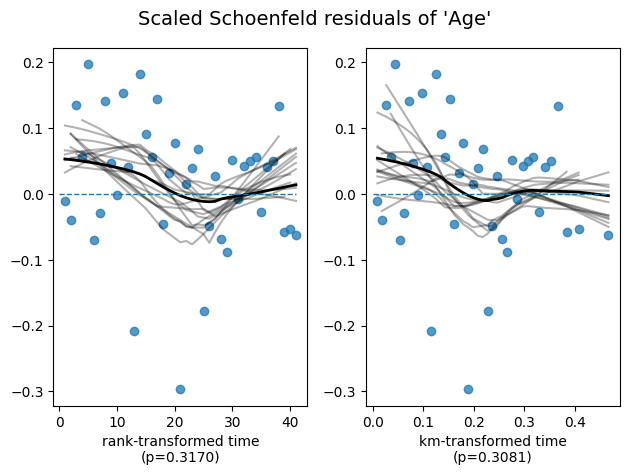

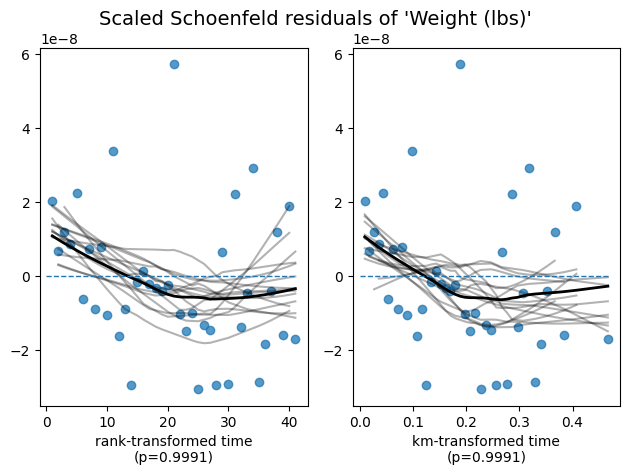

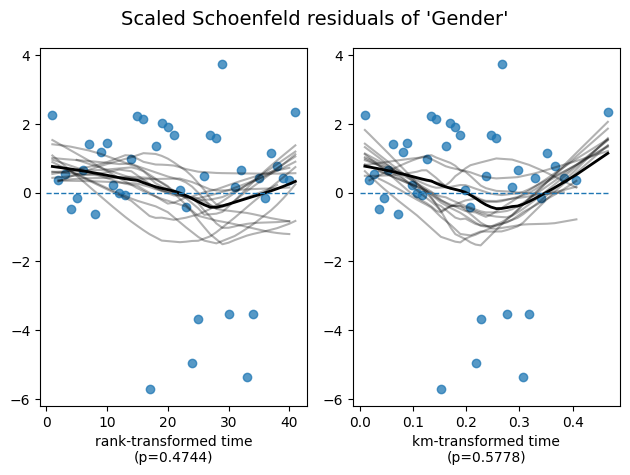

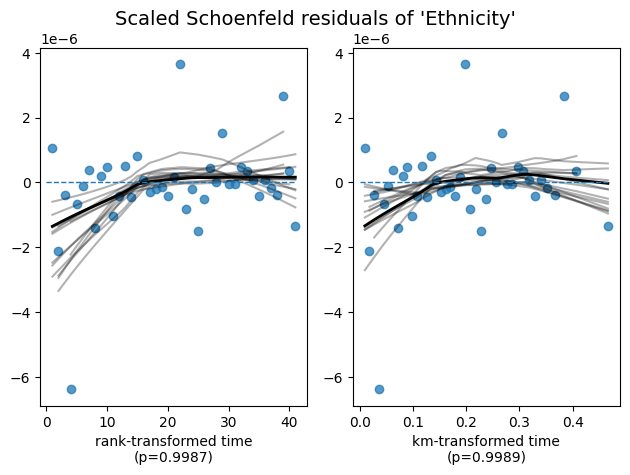

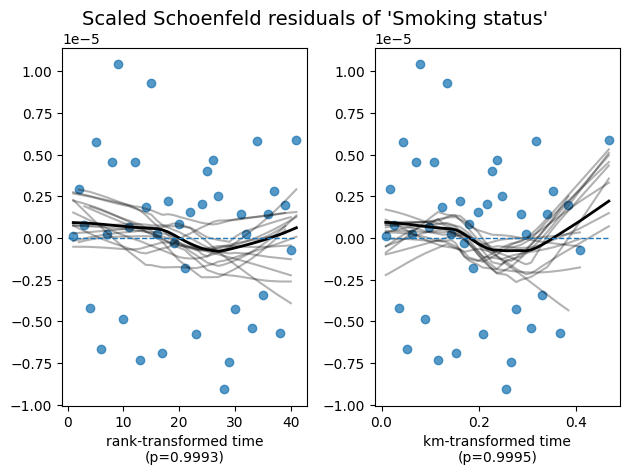

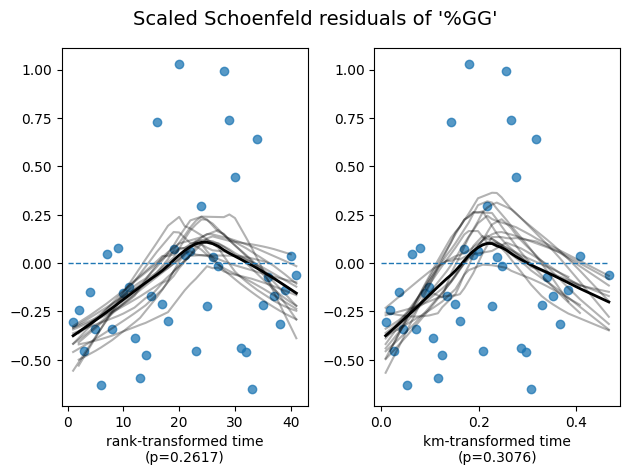

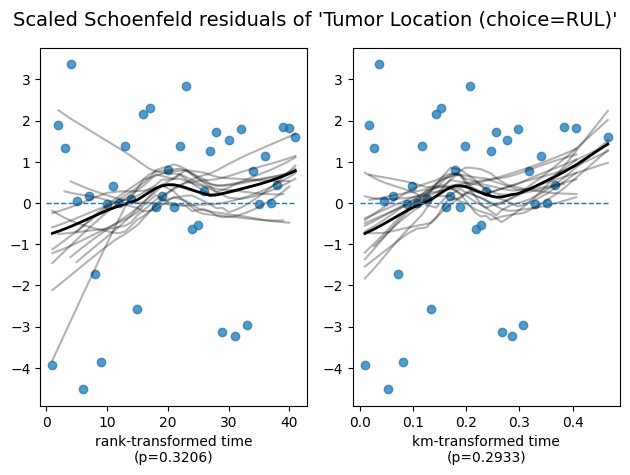

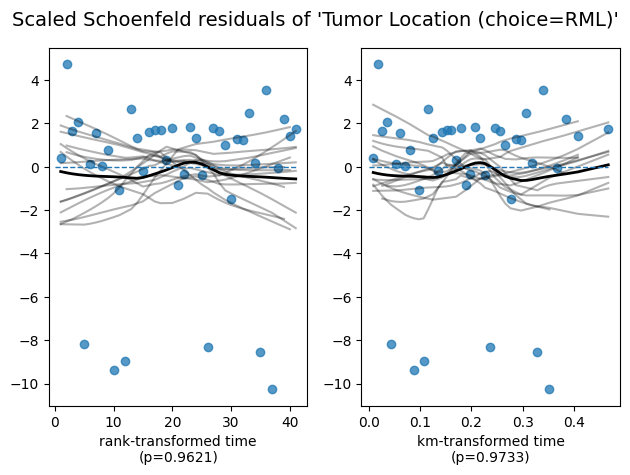

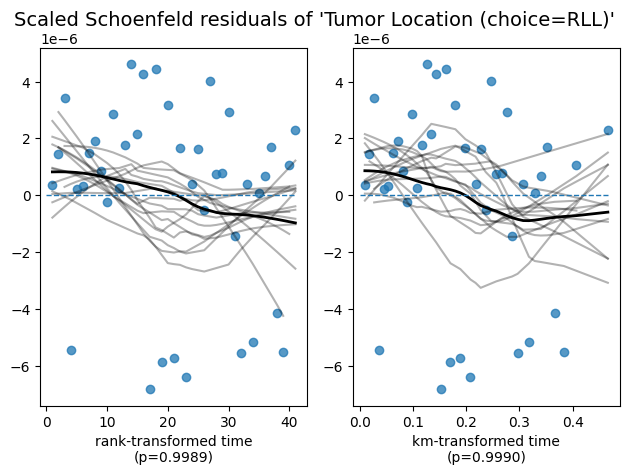

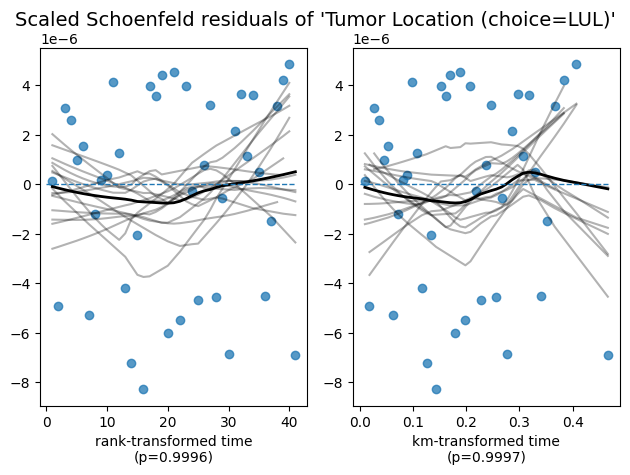

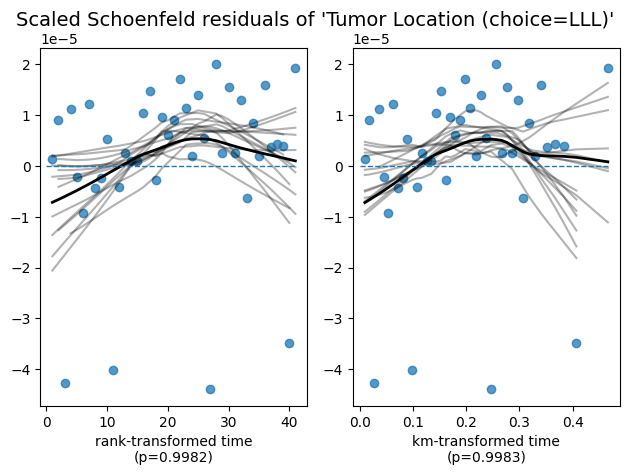

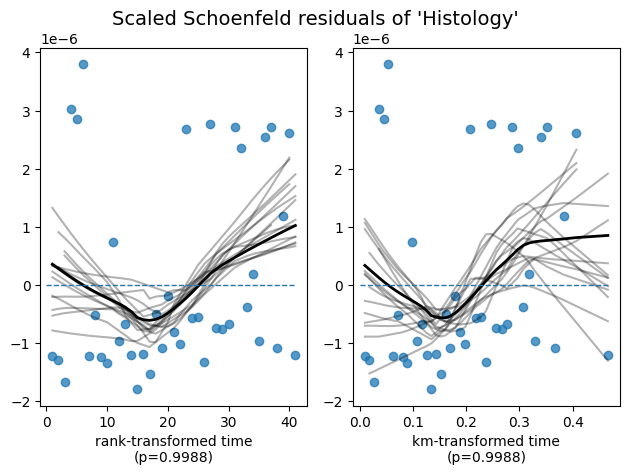

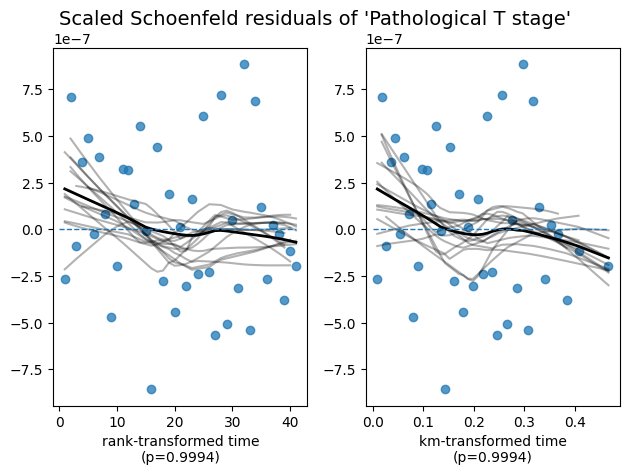

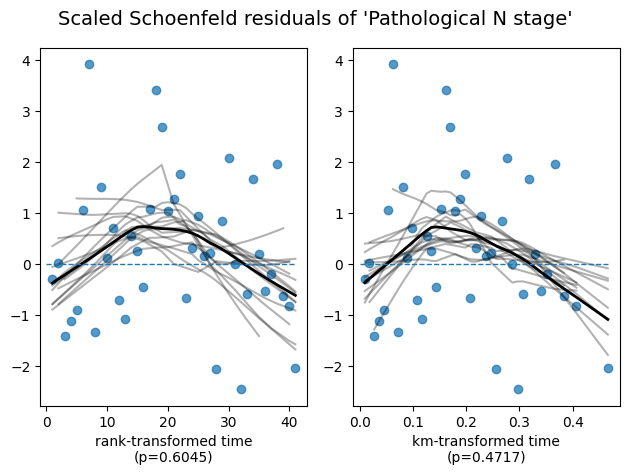

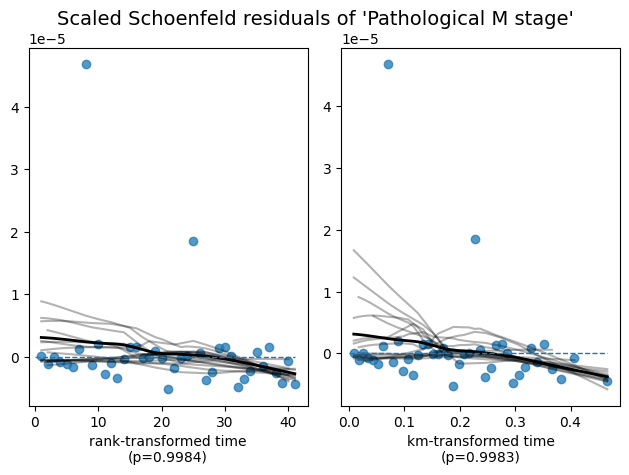

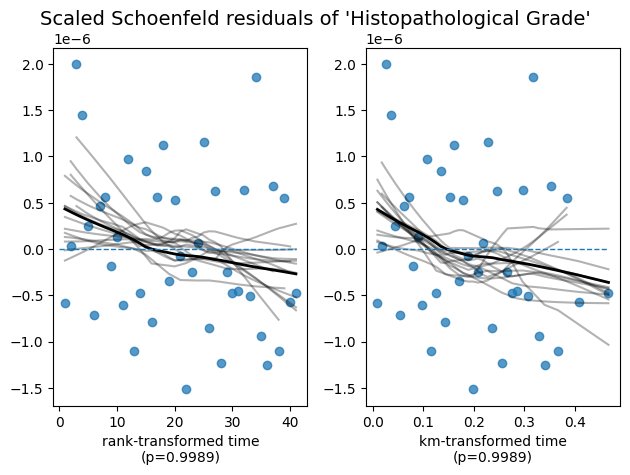

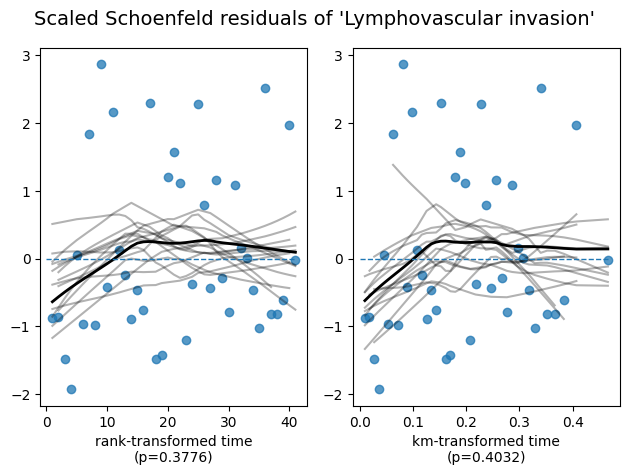

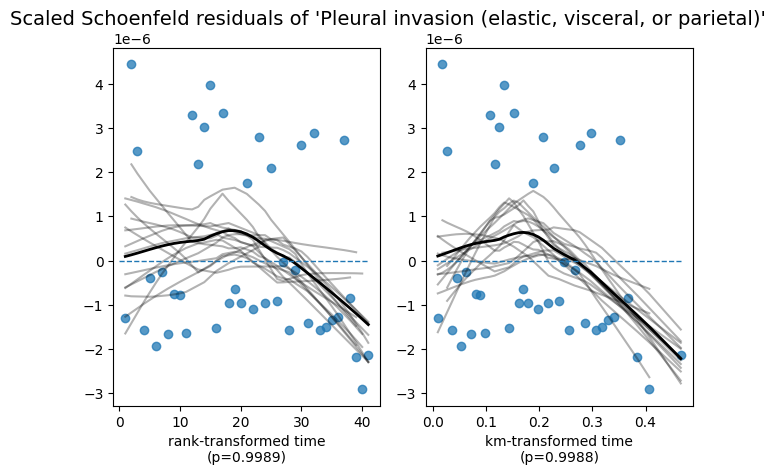

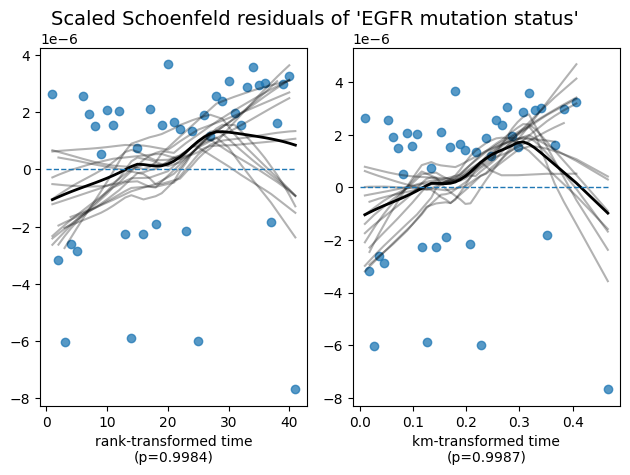

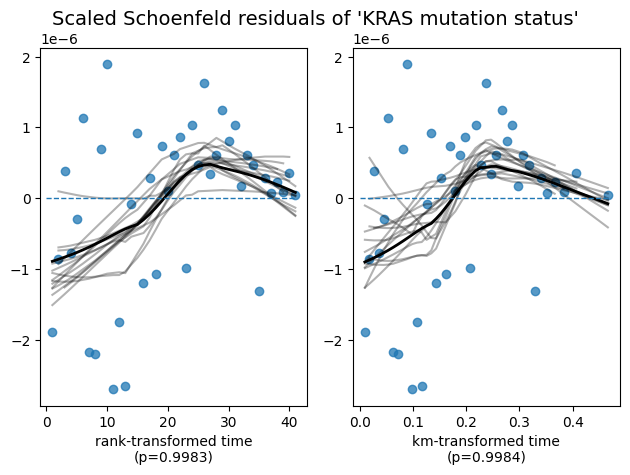

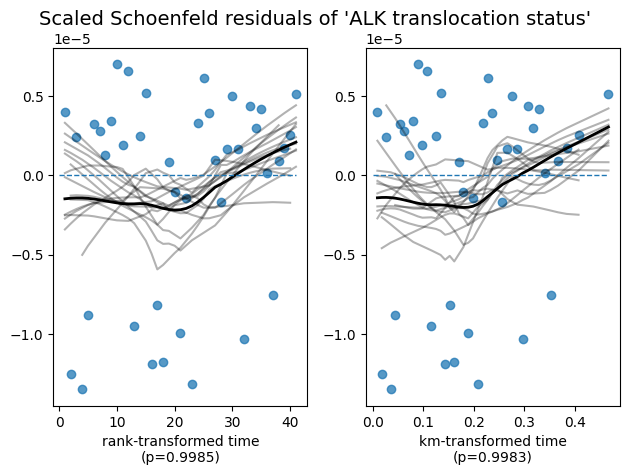

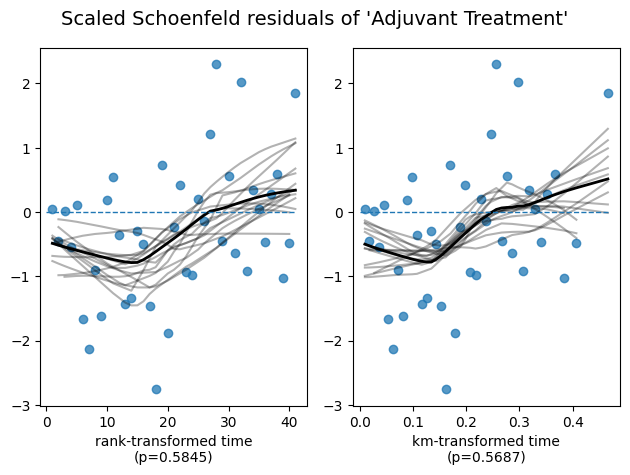

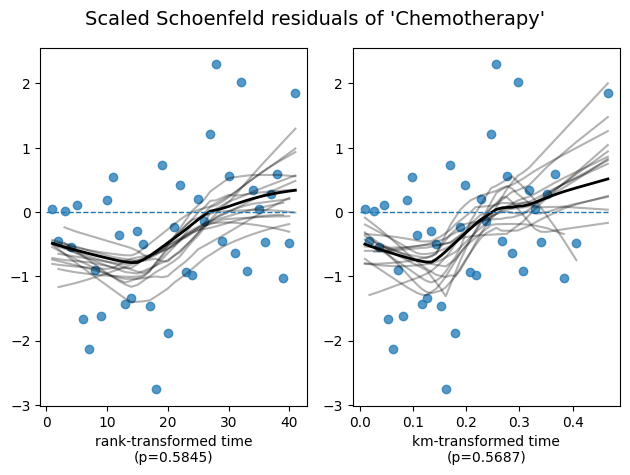

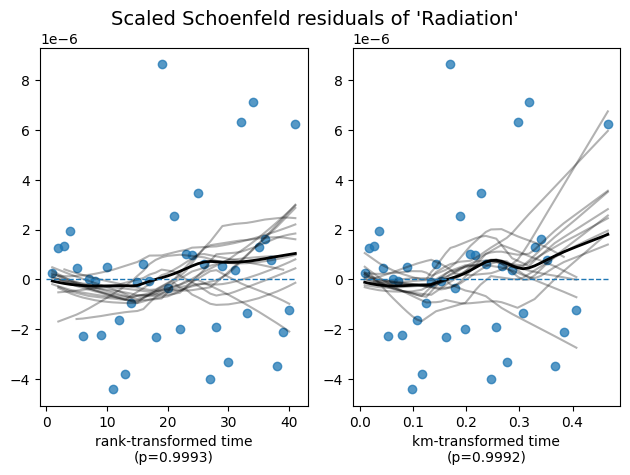

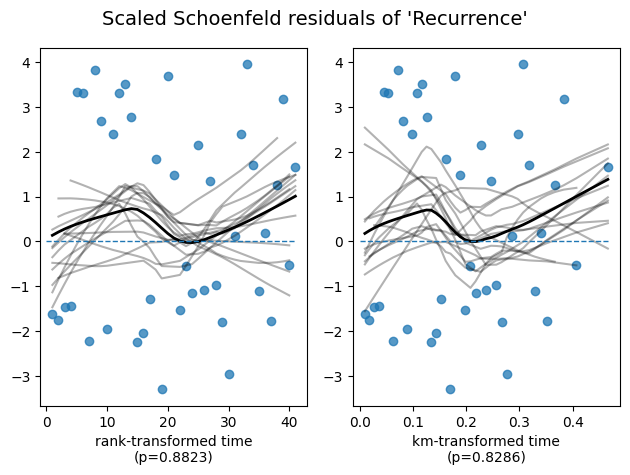

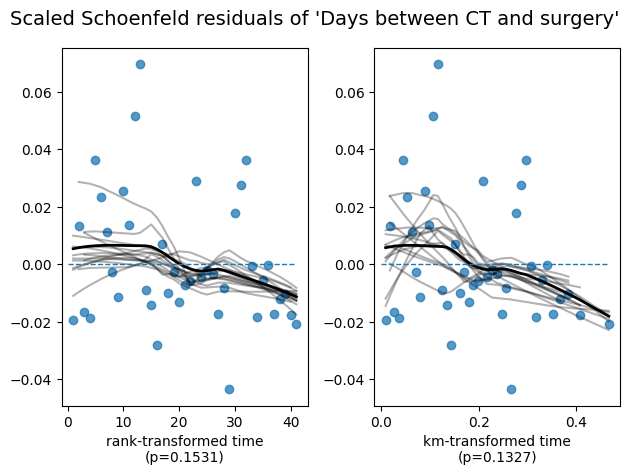

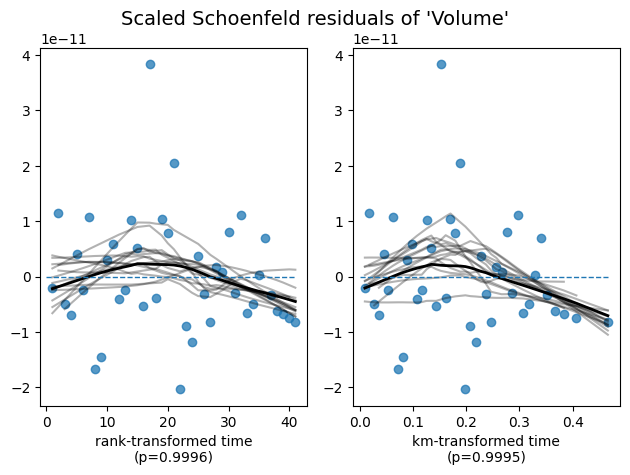

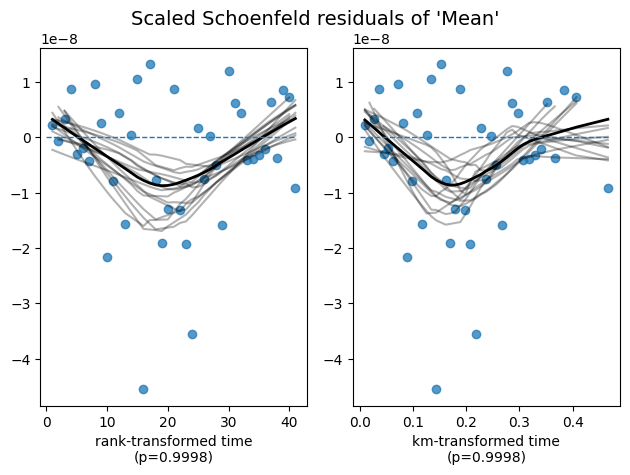

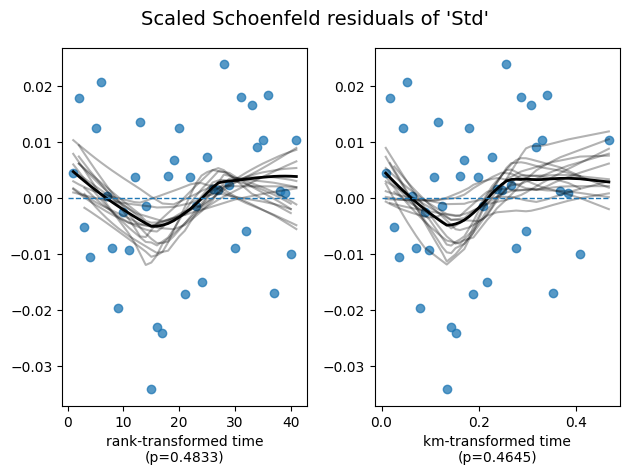

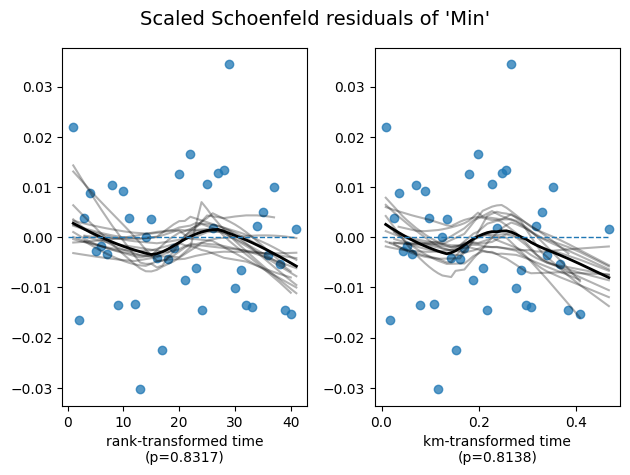

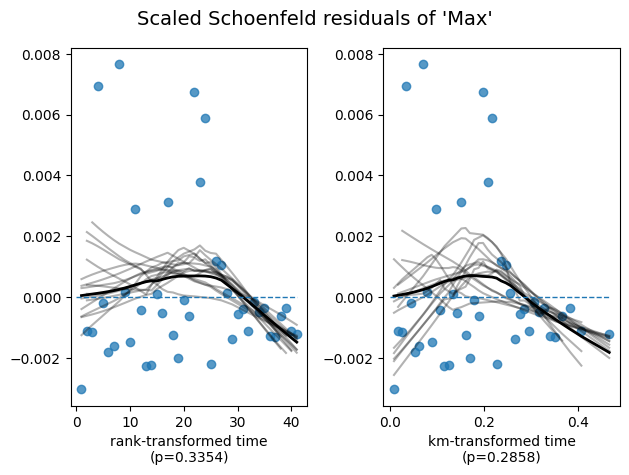

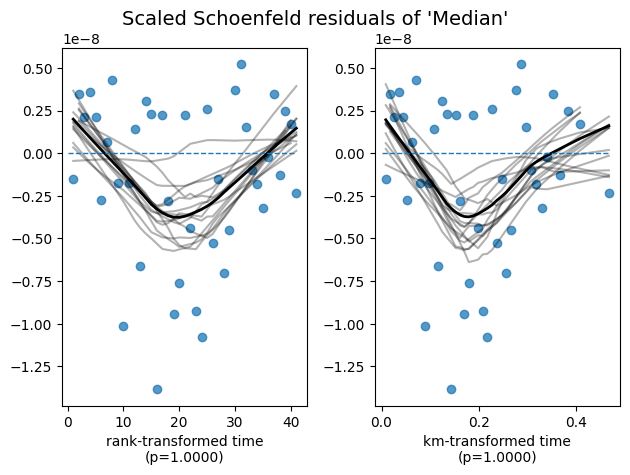

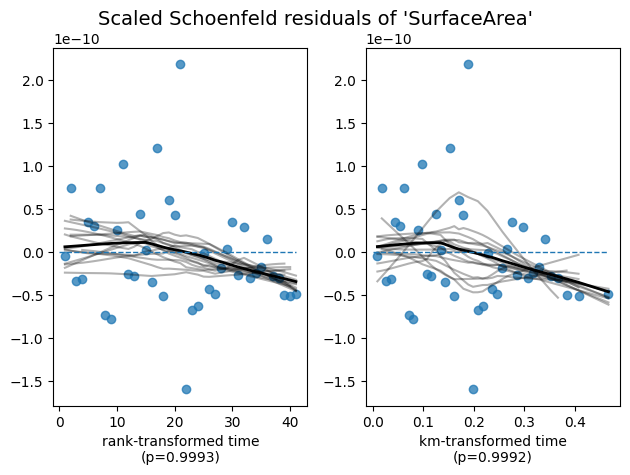

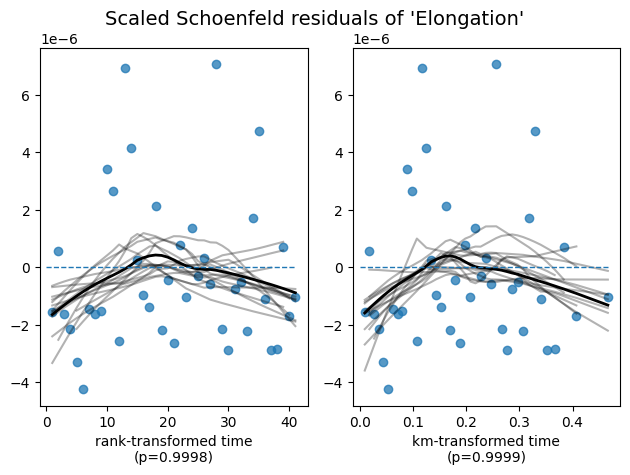

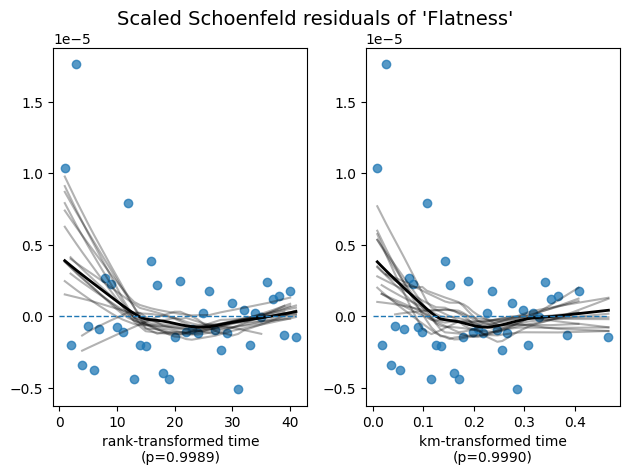

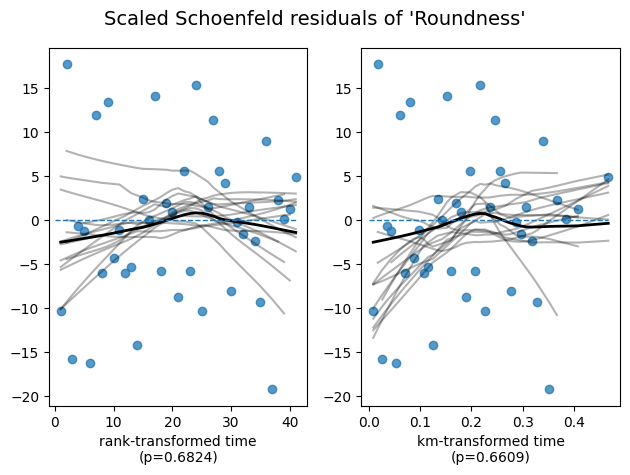

In [9]:
cph.check_assumptions(train_df, p_value_threshold=0.05, show_plots=True)